# Data Preparation

In [1]:
!wget https://raw.githubusercontent.com/Stellarator-X/ConvoBot/servus/Programming%20Assignments/Speech%20Recognition/ds_utils/aesthetix.py

--2020-06-17 21:18:30--  https://raw.githubusercontent.com/Stellarator-X/ConvoBot/servus/Programming%20Assignments/Speech%20Recognition/ds_utils/aesthetix.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1212 (1.2K) [text/plain]
Saving to: ‘aesthetix.py.6’

aesthetix.py.6      100%[===================>]   1.18K  --.-KB/s    in 0s      

2020-06-17 21:18:30 (58.9 MB/s) - ‘aesthetix.py.6’ saved [1212/1212]



In [2]:
import numpy as np 
from sklearn.model_selection import train_test_split
import aesthetix as at

In [3]:
# Downloading movie_lines
!wget https://raw.githubusercontent.com/Stellarator-X/ConvoBot/servus/Programming%20Assignments/Response%20Generation/movie_lines.txt

--2020-06-17 21:18:34--  https://raw.githubusercontent.com/Stellarator-X/ConvoBot/servus/Programming%20Assignments/Response%20Generation/movie_lines.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34641921 (33M) [text/plain]
Saving to: ‘movie_lines.txt.6’

movie_lines.txt.6   100%[===================>]  33.04M   156MB/s    in 0.2s    

2020-06-17 21:18:34 (156 MB/s) - ‘movie_lines.txt.6’ saved [34641921/34641921]



In [4]:
movielines = open("movie_lines.txt", mode='r')
print(movielines)
lines = movielines.readlines()
print(len(lines))

<_io.TextIOWrapper name='movie_lines.txt' mode='r' encoding='UTF-8'>
304713


In [5]:
for line in lines[-10:]:
  print(line)

L666262 +++$+++ u9031 +++$+++ m616 +++$+++ MELVILL +++$+++ Lighting COGHILL' 5 cigar: Our good Colonel Dumford scored quite a coup with the Sikali Horse.

L666522 +++$+++ u9034 +++$+++ m616 +++$+++ VEREKER +++$+++ So far only their scouts. But we have had reports of a small Impi farther north, over there. 

L666521 +++$+++ u9030 +++$+++ m616 +++$+++ DURNFORD +++$+++ And I assure you, you do not In fact I'd be obliged for your best advice. What have your scouts seen?

L666520 +++$+++ u9034 +++$+++ m616 +++$+++ VEREKER +++$+++ Well I assure you, Sir, I have no desire to create difficulties. 45

L666372 +++$+++ u9034 +++$+++ m616 +++$+++ VEREKER +++$+++ I think Chelmsford wants a good man on the border Why he fears a flanking attack and requires a steady Commander in reserve.

L666371 +++$+++ u9030 +++$+++ m616 +++$+++ DURNFORD +++$+++ Lord Chelmsford seems to want me to stay back with my Basutos.

L666370 +++$+++ u9034 +++$+++ m616 +++$+++ VEREKER +++$+++ I'm to take the Sikali with the 

In [6]:
sample_size = 30000
cleanlines = []
for i, line in enumerate(lines[:sample_size]):
  at.progress_bar("Cleaning the lines", i, len(lines[:sample_size]))
  speaker, line = line.split('+++$+++ ')[-2:]
  cleanlines.append([speaker.split(" ")[0], line.split('\n')[0]])

cleanlines.reverse()
cleanlines = np.array(cleanlines)
for line in cleanlines[:10]:
  print(line[0],":",line[1])

Cleaning the lines:[==============================](100.00%)  
BOZO : Yeah, maybe.
HEROINE : Get something on that.
BOZO : Where the hell are we going to go then, Billy Jack!?
HEROINE : There's a bomb shelter over in Durant, by the IGA, on First. You all know where that is?
BOZO : Welcome back.
ROADIE : F-f-fuck you.
ROADIE : They were all over the place.
BOZO : You smell like ass!
ROADIE : Look, the armed surround the unarmed in a circle and we move as a tight group. Those that can shoot, protect the rest to his ride.
BOZO : Hey, when this plan completely goes to shit, what are ya gonna do?


In [7]:
def clean_str(_str):
        _str = _str.strip()
        _str = _str.lower()
        _str = _str.replace(".", "")
        _str = _str.replace(",", "")
        _str = _str.replace("?", "")
        _str = _str.replace("!", "")
        _str = _str.replace(":", "")
        _str = _str.replace("-", " ")
        _str = _str.replace("_", " ")
        _str = _str.replace("\\", "")
        _str = _str.replace("  ", " ")
        return _str

In [8]:
# Forming the dataset 
response_data = []
l = len(cleanlines)-1
for i, line in enumerate(cleanlines[:-1]):
  at.progress_bar("Generating Stimulus-Response Pairs", i, l)
  speaker, utterance = line
  next_speaker, next_utterance = cleanlines[i+1]
  if speaker is not next_speaker:
    response_data.append(np.array([clean_str(utterance.lower()), clean_str(next_utterance.lower())]))
  
response_data = np.array(response_data)
print(response_data.shape)
print(response_data[-10:])

Generating Stimulus-Response Pairs:[=============================~](97.46%)  (29999, 2)
[['the "real you"' 'like my fear of wearing pastels']
 ['like my fear of wearing pastels'
  'i\'m kidding you know how sometimes you just become this "persona" and you don\'t know how to quit']
 ['i\'m kidding you know how sometimes you just become this "persona" and you don\'t know how to quit'
  'no']
 ['no' "okay  you're gonna need to learn how to lie"]
 ["okay  you're gonna need to learn how to lie" 'wow']
 ['wow' "let's go"]
 ["let's go" 'she okay']
 ['she okay' 'i hope so']
 ['i hope so' 'they do to']
 ['they do to' 'they do not']]


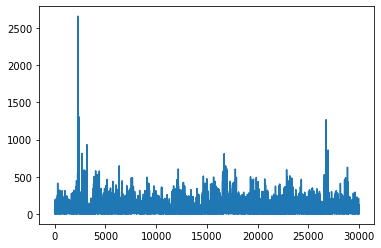

51.615920530684356
Longest utterance :  ["shit o dear that's enough to make me asthmatic the nerve of those twits what do they know about female odor don't interrupt here's my concept my ranch out west it's a beauty ranch oh it's got a few head of cattle for atmosphere and tax purposes but it's a beauty ranch a place where unhappy women  divorcees and widows mainly  can go to lose weight remove wrinkles change their hair styles and pretty themselves up for the next disappointment my ranch is named the rubber rose after the rubber rose douche bag my own invention and bless its little red bladder the most popular douche bag in the world so get this it's on the migratory flight path of the whooping cranes the last flock of wild whooping cranes left in existence well these cranes stop off at my little pond  siwash lake it's called  twice a year autumn and spring and spend a few days each time resting up eating doing whatever whooping cranes do i've never seen them understand but i hear the

In [9]:
import matplotlib.pyplot as plt 
%matplotlib inline
a = [len(s) for s in response_data[:,0]]
a_ = [s for s in response_data[:,0] if len(s)>2000]
plt.plot(a)
plt.show()
print(np.mean(np.array(a)))
print("Longest utterance : ", a_)

In [10]:
# Preprocessing the Data
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

oov_token = "<OOV>"
max_length = 300

stimuli = response_data[:, 0]
responses = response_data[:, 1]

tokenizer = Tokenizer(oov_token=oov_token)
tokenizer.fit_on_texts(stimuli)

word_index = tokenizer.word_index
vocab_size=len(word_index)

stimulus_sequences = tokenizer.texts_to_sequences(stimuli)
response_sequences = tokenizer.texts_to_sequences(responses)

padded_stimulus_sequences = pad_sequences(stimulus_sequences, maxlen = max_length ,padding = 'post', truncating = 'post')
padded_response_sequences = pad_sequences(response_sequences, maxlen = max_length, padding = 'post', truncating = 'post')

# Seq2Seq Attention Model

In [16]:
from keras.layers import Dense, GRU, Bidirectional, Concatenate, Permute, Dot, LSTM
from keras.layers import RepeatVector, Activation, Lambda, Input, Multiply, Embedding
from keras.optimizers import Adam 
from keras.utils import to_categorical
from keras.models import load_model, Model
import keras.backend as K

In [12]:
# Getting the embeddings matrix from trained Glove Embeddings
embedding_dim = 100

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt \
    -O /tmp/glove.6B.100d.txt
embeddings_index = {};
with open('/tmp/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((vocab_size+1, embedding_dim));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

--2020-06-17 21:20:20--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.184.128, 2a00:1450:400c:c0c::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.184.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347116733 (331M) [text/plain]
Saving to: ‘/tmp/glove.6B.100d.txt’

/tmp/glove.6B.100d. 100%[===================>] 331.04M  86.4MB/s    in 3.9s    

2020-06-17 21:20:24 (85.0 MB/s) - ‘/tmp/glove.6B.100d.txt’ saved [347116733/347116733]



In [13]:
# Shared Layers
Repeator = RepeatVector(300)
Concatenator = Concatenate()
Dense1 = Dense(10, activation = 'tanh')
Dense2 = Dense(1, activation = 'relu')
Activator = Activation(lambda x:K.softmax(x, axis = 1), name = 'Attention_params')
DotLayer = Dot(axes=1)

In [14]:
def AttentionLayer(a, s_prev):
  s_prev = Repeator(s_prev)
  concat = Concatenator([a, s_prev])
  e = Dense1(concat)
  e = Dense2(e)
  alphas = Activator(e)
  context = DotLayer([alphas, a])
  return context

In [17]:
pre_attention_units = 200
post_attention_units = 400
outLength = 500

PostAttentionGru = LSTM(post_attention_units, return_state=True)
OutputLayer = Dense(outLength, activation = 'softmax')

In [18]:
def ResponseModel(maxlen, pre_attention_units, post_attention_units, vocab_size):
  """
    Parameters:
      maxlen : maxlen
      pre_attention_units : hidden state size of the BiGRU
      post_attention_units : hidden state size of the post-attention GRU
      vocab_size -- size of the python dictionary "human_vocab"
    Returns:
      ResponseModel instance  
  """
  X = Input(shape=(maxlen,))
  s0 = Input(shape = (post_attention_units,), name = 's0')
  c0 = Input(shape = (post_attention_units,), name = 'c0')
  s=s0
  c=c0

  outputs = []

  X_emb = Embedding(vocab_size+1, embedding_dim, weights = [embeddings_matrix], trainable = False, input_length=maxlen)(X)
  a = Bidirectional(GRU(units = pre_attention_units, return_sequences=True))(X_emb)

  for t in range(maxlen):
    context = AttentionLayer(a, s)
    s, _ ,c = PostAttentionGru(context, initial_state=[s, c])
    out = OutputLayer(s)
    outputs.append(out)
  
  model = Model(inputs = [X, s0, c0], outputs = outputs)

  return model

In [19]:
randommod = ResponseModel(max_length, 200, 400, vocab_size)
randommod.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 300)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 300, 100)     1639000     input_1[0][0]                    
__________________________________________________________________________________________________
s0 (InputLayer)                 (None, 400)          0                                            
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 300, 400)     361200      embedding_1[0][0]                
____________________________________________________________________________________________